# Destek Vektör Regresyonu(SVR)

Amaç, bir marjin aralığına maksimum noktayı en küçük hata ile alabilecek(marjin minimizasyonu) şekilde,

doğruyu ya da eğriyi belirlemektir.

--------------------

# 1. Model (Doğrusal Olmayan SVR)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
hit = pd.read_csv("Hitters.csv")

df = hit.copy()

df = df.dropna()

dms = pd.get_dummies(df[["League", "Division", "NewLeague"]])

X_ = df.drop(["Salary", "League", "Division", "NewLeague"], axis = 1).astype("float64")

X = pd.concat([X_, dms[["League_N", "Division_W", "NewLeague_N"]]], axis = 1)

y = df["Salary"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [3]:
np.random.seed(3)

x_sim = np.random.uniform(2, 10, 145)
y_sim = np.sin(x_sim) + np.random.normal(0, 0.4, 145)

# aykırı gözlemler
x_outliers = np.arange(2.5, 5, 0.5)
y_outliers = -5 * np.ones(5)

x_sim_idx = np.argsort(np.concatenate([x_sim, x_outliers]))
x_sim = np.concatenate([x_sim, x_outliers])[x_sim_idx]
y_sim = np.concatenate([y_sim, y_outliers])[x_sim_idx]

In [4]:
ols = LinearRegression()
ols.fit(np.sin(x_sim[:, np.newaxis]), y_sim)
ols_pred = ols.predict(np.sin(x_sim[:, np.newaxis]))

eps = 0.1
svr = SVR("rbf", epsilon = eps)  # radial basis function
svr.fit(x_sim[:, np.newaxis], y_sim)
svr_pred = svr.predict(x_sim[:, np.newaxis])

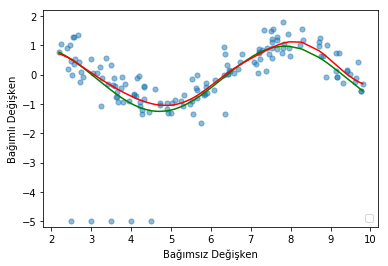

In [11]:
plt.scatter(x_sim, y_sim, alpha = 0.5, s = 26)
plt_ols = plt.plot(x_sim, ols_pred, "green")
plt_svr = plt.plot(x_sim, svr_pred, "red")
plt.xlabel("Bağımsız Değişken")
plt.ylabel("Bağımlı Değişken")
plt.ylim(-5.2, 2.2)
plt.legend([plt_ols, plt_svr], ["EKK", "SVR"], loc = 4);

# çizimde aykırı gözlemlere bak(en altta)
# EKK'yı aşağı doğru çekmiş.

In [12]:
svr_rbf = SVR("rbf").fit(X_train, y_train)

In [13]:
svr_rbf

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

---------

# 2. Tahmin (Doğrusal Olmayan SVR)

In [15]:
svr_rbf.predict(X_test)

array([425.76666667, 425.76666667, 425.76666667, 425.76666667,
       425.76666667, 425.76666667, 425.76666667, 425.76666667,
       425.76666667, 425.76666667, 425.76666667, 425.76666667,
       425.76666667, 425.76666667, 425.76666667, 425.76666667,
       425.76666667, 425.76666667, 425.76666667, 425.76666667,
       425.76666667, 425.76666667, 425.76666667, 425.76666667,
       425.76666667, 425.76666667, 425.76666667, 425.76666667,
       425.76666667, 425.76666667, 425.76666667, 425.76666667,
       425.76666667, 425.76666667, 425.76666667, 425.76666667,
       425.76666667, 425.76666667, 425.76666667, 425.76666667,
       425.76666667, 425.76666667, 425.76666667, 425.76666667,
       425.76666667, 425.76666667, 425.76666667, 425.76666667,
       425.76666667, 425.76666667, 425.76666667, 425.76666667,
       425.76666667, 425.76666667, 425.76666667, 425.76666667,
       425.76666667, 425.76666667, 425.76666667, 425.76666667,
       425.76666667, 425.76666667, 425.76666667, 425.76

In [16]:
y_pred = svr_rbf.predict(X_test)

In [17]:
np.sqrt(mean_squared_error(y_test, y_pred))

473.4445984431814

-------------

# 3. Model Doğrulama / Model Tuning (Doğrusal Olmayan SVR)

In [19]:
svr_rbf  # C = 1.0

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [20]:
svr_params = {"C" : [0.1, 0.4, 5, 10, 20, 30, 40, 50]}
svr_cv_model = GridSearchCV(svr_rbf, svr_params, cv = 10)
svr_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 0.4, 5, 10, 20, 30, 40, 50]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [21]:
svr_cv_model.best_params_

{'C': 20}

In [22]:
pd.Series(svr_cv_model.best_params_)

C    20
dtype: int64

In [23]:
pd.Series(svr_cv_model.best_params_)[0]

20

In [26]:
# final modeli

svr_cv_model_best = pd.Series(svr_cv_model.best_params_)[0]

svr_tuned = SVR(kernel = "rbf", C = svr_cv_model_best)

svr_tuned.fit(X_train, y_train)

y_pred = svr_tuned.predict(X_test)

In [27]:
np.sqrt(mean_squared_error(y_test, y_pred))

472.20974524750574

------------